<div style="text-align:center">
    <img src="https://i.imgur.com/9OPPoyS.png"/>
    <img src="https://i.imgur.com/Yqk6mtM.png"/>
</div>


# <p style="background-color:#253943;font-family:monospace;color:white;font-size:100%;text-align:center;border-radius:5px;padding:15px">Introduction 👋</p>

<div class="container" style=" max-width: auto;">
<img style="width: 250px; float: left; margin-right:30px;"src="https://i.imgur.com/9XSG0aW.png"/>
<div style="display: inline;">
<h2 style="color: #e63e50">Early Life of Cristiano Ronaldo</h2>
- Cristiano Ronaldo, in full Cristiano Ronaldo dos Santos Aveiro, (born February 5, 1985, Funchal, Madeira, Portugal), Portuguese football (soccer) forward who was one of the greatest players of his generation.<br>
- He grew up in a poor family and had to share a bedroom and bathroom with his older brother and two older sisters.<br>
- He started playing soccer at an early age when he was just eight. He was always running away from doing homework.<br>
- He was nicknamed ‘cry baby’ because he felt bad when he used to pass the ball to his friends and they couldn’t score.<br>
- A very popular student in school, Ronaldo was expelled at the age of 14 for throwing a chair at his teacher who Ronaldo thought disrespected him. He then turned his entire attention to soccer and went on to become the world’s greatest soccer player.<br>
- But at the age of 15 Ronaldo was diagnosed with ‘racing heart’. His condition was serious and would have made him let go of football. But a surgery saved him and he went back for his training.
</div>
</div>

<div class="container" style=" max-width: auto;">
<img style="width: 250px; float: right;"src="https://i.imgur.com/oyy7G2A.png"/>
<div style="display: inline">
<h2 style="color: #e63e50">Achievements of Cristiano Ronaldo</h2>
Collectively, Ronaldo has won 32 senior trophies in his career. He has also attained one title from youth and at least five titles  from friendly competitions. All in all he had won over 300 trophies and medals by January 2021, with some of them dating back to his childhood.<br><br>
- Number of trophies won by Cristiano Ronaldo as of 2022, by competition:<br><br><br>
<div style=" background-color:#3b3745; padding: 13px 13px; border-radius: 8px; color: white">
<b>Champions League winner:</b> 5<br>
<b>Golden Boot winner:</b> 5<br>
<b>FIFA Club World Cup winner:</b> 4<br>
<b>World Cup participant:</b> 4<br>
</div>
</div>
</div>

# <p style="background-color:#253943;font-family:monospace;color:white;font-size:100%;text-align:center;border-radius:5px;padding:15px">Import Libraries 📦</p>

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.graph_objects import Layout

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from IPython.display import HTML as html_print

from datetime import datetime

This is the color palette of this notebook


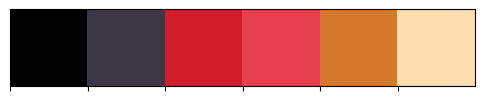

In [2]:
colors = ["black", '#3b3745', '#cf1d2a', '#e63f50', '#d5792c', '#FCDDB0']
print("This is the color palette of this notebook")
sns.palplot(sns.color_palette(colors))

# <p style="background-color:#253943;font-family:monospace;color:white;font-size:100%;text-align:center;border-radius:5px;padding:15px">Functions ⚙️</p>

In [3]:
# Print Information
def cprint(title, text, color='#e63e50'):
    text = "<strong style=color:{}>{}:</strong><br>".format(color, title) + \
            "<text>{}</text>".format(text)
    return html_print(text)

# Hatching Plot
def hatching_plot(df, x, y, color, pattern, pattern_shape, title):
    fig = px.bar(df, x=x, y=y,
                       color=color, pattern_shape=pattern,
                       pattern_shape_sequence=pattern_shape)
    fig.update_yaxes(showgrid=False, visible=False)
    fig.update_xaxes(categoryorder='total descending')
    fig.update_traces(hovertemplate=None, texttemplate="%{y}", textfont_color='white',
                      marker=dict(line=dict(color='#000000', width=2)),
                      marker_color = colors[3])
    fig.update_layout(margin=dict(t=80, b=100, l=90, r=60),
                            title_text=title,
                            xaxis_tickangle=360,
                            xaxis=dict(color="white"),
                            plot_bgcolor=colors[1], paper_bgcolor=colors[1],
                            title_font=dict(size=25, color='white', family="Arial"),
                            font=dict(color='black'),
                            legend=dict(font=dict(
                                    family="Courier",
                                    size=12,
                                color="white",

                            ))
                            )
    # Add image
    fig.add_layout_image(
        dict(
            source="https://i.imgur.com/2Cv9yGn.png",
            xref="paper", yref="paper",
            x= 0.3, y=0.9,
            sizex=0.6, sizey=0.6,
            opacity = 0.2,
            xanchor="left", yanchor="top"
        )
    )
    fig.show()

# Return the winner
def winner(row):
    if row['result_home'] > row['result_away']:
        val = "H"
    else:
        val = "A"
    return val

# Return the winning Club
def cr7_club_result(row):
    if row['Venue'] == row['winner']:
        val = "win"
    else:
        val = "lose"
    return val

def win_goal(row):
    if row['Venue'] == row['winner'] and row['at_score_home'] == row['at_score_away']:
        if row['winner'] == "H":
            if row["result_home"] == row["at_score_home"] + 1:
                save = "yes"
            else:
                save = "no"
        else:
            if row["result_away"] == row["at_score_away"] + 1:
                save = "yes"
            else:
                save = "no"
    else:
        save = "no"
    return save

# <p style="background-color:#253943;font-family:monospace;color:white;font-size:100%;text-align:center;border-radius:5px;padding:15px">Hello, data! 😊</p>

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


In [6]:
cprint("The dataset Columns", df.columns)

<div style=" background-color:#3b3745; padding: 13px 13px; border-radius: 8px; color: white">
<b>Season:</b> Season year of the match<br>
<b>Competition:</b> Football Competition name<br>
<b>Matchday:</b> Number/name of the match of the league/season/competition<br>
<b>Date:</b> Date of the match<br>
<b>Venue:</b> Match Venue ( Home/Away )<br>
<b>Club:</b> CR Club<br>
<b>Opponent:</b> The opponent name<br>
<img style="width: 400px; float: right;"src="https://i.imgur.com/2Cv9yGn.png"/>
<b>Result:</b> Match result in (home:away) format<br>
<b>Playing Position:</b> CR's playing position in the match<br>
<b>Minute:</b> The time of the goal<br>
<b>At_score:</b> Score before the Goal<br>
<b>Goal_assist:</b> Goal assist player name<br>
</div>


In [7]:
cprint("The size of the dataset", df.shape)

In [8]:
df.describe(include=['object']).T

,count,unique,top,freq
Season,701,21,14/15,61
Competition,701,16,LaLiga,311
Matchday,701,52,Group Stage,75
Date,701,464,09-12-15,5
Venue,701,2,H,403
Club,701,4,Real Madrid,450
Opponent,701,125,Sevilla FC,27
Result,701,53,3:00,49
Playing_Position,643,5,LW,356
Minute,701,106,90,17


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            701 non-null    object
 1   Competition       701 non-null    object
 2   Matchday          701 non-null    object
 3   Date              701 non-null    object
 4   Venue             701 non-null    object
 5   Club              701 non-null    object
 6   Opponent          701 non-null    object
 7   Result            701 non-null    object
 8   Playing_Position  643 non-null    object
 9   Minute            701 non-null    object
 10  At_score          701 non-null    object
 11  Type              686 non-null    object
 12  Goal_assist       459 non-null    object
dtypes: object(13)
memory usage: 71.3+ KB


In [10]:
df.isnull().sum()

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position     58
Minute                0
At_score              0
Type                 15
Goal_assist         242
dtype: int64

<div style=" background-color:#cf1d2a; padding: 13px 13px; border-radius: 8px; color: white; text-align: center;">
⚠️Oppps, We have a lot of missing data
</div>
<img style=" display: block;
  margin-left: auto;
  margin-right: auto;
  width: 50%;"src="https://66.media.tumblr.com/b62d87de0adcf51152eb72c101f836f1/1a1bee8940b8cf54-f8/s500x750/cf72aa8ca56ec8d9f319362c0a75959d716cef50.gif"/>


# <p style="background-color:#253943;font-family:monospace;color:white;font-size:100%;text-align:center;border-radius:5px;padding:15px">Let's make some data changes! 🐙</p>

In [11]:
df.Playing_Position.unique()

array(['LW', nan, 'RW', 'CF', 'LW ', 'CF '], dtype=object)

In [12]:
# Remove space in values
df['Playing_Position'] = df['Playing_Position'].replace('LW ','LW')
df['Playing_Position'] = df['Playing_Position'].replace('CF ','CF')

In [13]:
# Correct some values in Season Column
df['Season'] = df['Season'].replace('Dec-13','12/13')

In [14]:
# Change to Datetime type
df['Date'] = pd.to_datetime(df.Date)

In [15]:
# Create some useful data for visualization
df[['result_home','result_away']] = df.Result.str.split(":", expand=True)

In [16]:
# Keep only number
df["result_away"] = df['result_away'].str.extract('(\d+)').astype(int)

# Change column type to integer
df["result_home"] = pd.to_numeric(df["result_home"])

In [17]:
df['winner'] = df.apply(winner, axis=1)
df['cr7_club_result'] = df.apply(cr7_club_result, axis=1)

In [18]:
# Create some useful data for visualization
df[['at_score_home','at_score_away']] = df.At_score.str.split(":", expand=True)

# Change to numeric columns
df["at_score_home"] = pd.to_numeric(df["at_score_home"])
df["at_score_away"] = pd.to_numeric(df["at_score_away"])


df['save'] = df.apply(win_goal, axis=1)

In [19]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,result_home,result_away,winner,cr7_club_result,at_score_home,at_score_away,save
0,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN,3,0,H,win,2,0,no
1,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge,3,0,H,win,3,0,no
2,02/03,Liga Portugal,8,2002-10-26,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins,1,2,A,win,1,2,no
3,02/03,Taca de Portugal Placard,Fourth Round,2002-11-24,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates,4,1,H,win,3,0,no
4,02/03,Taca de Portugal Placard,Fifth Round,2002-12-18,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN,8,1,H,win,3,0,no


# <p style="background-color:#253943;font-family:monospace;color:white;font-size:100%;text-align:center;border-radius:5px;padding:15px">Let's make some art! 📊</p>

In [20]:
goals_club = df.groupby("Club").size().reset_index(name='counts')

fig = go.Figure(data=[go.Pie(labels=goals_club["Club"], values=goals_club["counts"], pull=[0, 0, 0.2])])
fig.update_traces(textposition='inside', textinfo='percent', textfont_color="white",
                  marker=dict(colors=colors[2:], line=dict(color='white', width=2)))

# Add title
fig.update_layout(legend=dict(font=dict(
            family="Courier",
            size=12,
            color="white",

        )), title_text='Goals per Clubs',
                  title_font=dict(size=25, color=colors[2], family="Arial"),
                  paper_bgcolor="#3b3745", title_font_color=colors[2])

# Add image
fig.add_layout_image(
    dict(
        source="https://i.imgur.com/3Uo2tzt.png",
        xref="paper", yref="paper",
        y=0.7,
        opacity= 0.3,
        sizex=0.7, sizey=1,
        xanchor="left", yanchor="top"
    )
)
fig.show()

<div style=" background-color:#cf1d2a;padding: 13px 13px;border-radius: 8px;color: white;text-align: center;">
More than 50% of Cristiano's goals were with Real Madrid. It's normal because CR was signed to Real Madrid from Manchester United on July 1st, 2009, and left for Juventus on July 10th, 2018, so 9 years and 9 days with Real Madrid more than other clubs.
</div>


Goals per Position of playing

In [21]:
goals_position = df.groupby("Playing_Position").size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
goals_position

,Playing_Position,counts
1,LW,361
0,CF,203
2,RW,79


In [22]:
layout = Layout(plot_bgcolor="#3b3745")
fig = go.Figure(layout= layout)
fig.add_trace( go.Funnel(
    y = goals_position.Playing_Position,
    x = goals_position.counts,
    textposition = "inside",
    textinfo = "label+percent total",
    opacity = 0.65,
    marker = {"color": colors[2],
              "line": {"width": [4, 2, 2, 3, 1, 1], "color": 'white'}
              },
    ))
fig.update_layout(legend=dict(font=dict(
            family="Courier",
            size=12,

        )), title_text='Goals per Playing Position',
                  title_font=dict(size=25, color=colors[2], family="Arial"),
                  paper_bgcolor="#3b3745", title_font_color=colors[2])
fig.update_yaxes(showticklabels=False)
# Add image
fig.add_layout_image(
    dict(
        source="https://i.imgur.com/3Uo2tzt.png",
        xref="paper", yref="paper",
        x=0.0, y=0.5,
        opacity= 0.3,
        sizex=0.7, sizey=1,
        xanchor="left", yanchor="top"
    )
)
fig.show()

In [23]:
goals_position_club = (
    df.groupby(['Club', 'Playing_Position'], as_index=False)
      .agg(count=('Playing_Position', 'count'))
)

hatching_plot(goals_position_club, "Club", "count", "Playing_Position", "Playing_Position", [".", "x", "+"], "Position Played per Club")

<div style=" background-color:#cf1d2a; padding: 13px 13px; border-radius: 8px; color: white;">
A winger (left winger and right winger LW/RW) (historically called outside-left and outside-right, or outside forward) is an attacking player who is stationed in a wide position near the touchlines.<br>
CF – center forward. The attacker that is positioned in the middle of the offensive line. In modern football it has become common to only use one or two attackers; therefore a center forward may not be quite relevant as a description.<br>
The official Positions of Cristiano Ronaldo are LF and CF
</div>

In [24]:
goals_club = df.groupby("Type").size().reset_index(name='counts')

fig = go.Figure(data=[go.Pie(labels=goals_club["Type"], values=goals_club["counts"])])
fig.update_traces(textposition='inside', textinfo='percent', textfont_color="white",
                  marker=dict(colors=colors[2:], line=dict(color='white', width=2)))

# Add title
fig.update_layout(legend=dict(font=dict(
            family="Courier",
            size=12,
            color="white",

        )), title_text='Goals per Type',
                  title_font=dict(size=25, color=colors[2], family="Arial"),
                  paper_bgcolor="#3b3745", title_font_color=colors[2])

# Add image
fig.add_layout_image(
    dict(
        source="https://i.imgur.com/3Uo2tzt.png",
        xref="paper", yref="paper",
        y=0.7, x=-0.03,
        opacity= 0.3,
        sizex=0.7, sizey=1,
        xanchor="left", yanchor="top"
    )
)
fig.show()

<div style=" background-color:#cf1d2a; padding: 13px 13px; border-radius: 8px; color: white;">
Ronaldo's right foot is his most potent weapon in international football, and he is slightly more potent with his head than he is with his left foot.
He may not be quite as accurate with his weaker left foot but he's certainly got the power. We've seen the Portuguese superstar smash in 30-yarders with his left foot.
</div>


In [25]:


goals_season = df.groupby("Season").size().reset_index(name='counts')

fig = px.line(goals_season, x='Season', y='counts',  markers=True)
fig.update_yaxes(showgrid=False, visible=False)
fig.update_xaxes(showgrid=False)
fig.update_traces(marker=dict(line=dict(color='white', width=2)),
                  marker_color = colors[3], line_color=colors[3],
                        line_width=5)
fig.update_layout(margin=dict(t=80, b=100, l=90, r=60),
                        title_text="Goals Per Season",
                        xaxis_tickangle=360,
                        xaxis=dict(color="white"),
                        plot_bgcolor=colors[1], paper_bgcolor=colors[1],
                        title_font=dict(size=25, color=colors[3], family="Arial"),
                        font=dict(color='black'),
                        legend=dict(font=dict(
                                family="Courier",
                                size=12,
                            color="white",
                        ))
                        )
fig.add_annotation(x="14/15", y=63,
            text="Highest Goals Count",
            showarrow=True,
            font=dict(
                family="sans serif",
                size=18,
                color=colors[4]
                    ),
           arrowcolor="white",
           arrowhead=1)
fig.show()

<div style=" background-color:#cf1d2a; padding: 13px 13px; border-radius: 8px; color: white;">
The 2014 FIFA Ballon d'Or Gala was the fifth year for FIFA's awards for the top football players and coaches of the year. The awards were given out in Zürich on 12 January 2015.
Real Madrid and Portugal forward Cristiano Ronaldo won the FIFA Ballon d'Or as the World Player of the Year for a second consecutive time, having won it previously last year.
</div>


In [26]:
wins_club = (
    df.groupby(['Club', 'cr7_club_result'], as_index=False)
      .agg(count=('cr7_club_result', 'count'))
)

hatching_plot(wins_club, "Club", "count", "cr7_club_result", "cr7_club_result", [".", "x"], "Results of CR's Clubs")

<div style=" background-color:#cf1d2a; padding: 13px 13px; border-radius: 8px; color: white;">
Very obvious that most of the data is for winning matches of Cristiano Ronaldo with his different clubs.<br>
Let's see now all his wins compared to losses in all clubs.
</div>

In [27]:
win_lose = df.groupby("cr7_club_result").size().reset_index(name='counts')

fig = go.Figure(data=[go.Pie(labels=win_lose["cr7_club_result"], values=win_lose["counts"], pull=[0, 0, 0.2])])
fig.update_traces(textposition='inside', textinfo='percent', textfont_color="white",
                  marker=dict(colors=colors[2:], line=dict(color='white', width=2)))

# Add title
fig.update_layout(legend=dict(font=dict(
            family="Courier",
            size=12,
            color="white",

        )), title_text='Wins vs Losses',
                  title_font=dict(size=25, color=colors[2], family="Arial"),
                  paper_bgcolor="#3b3745", title_font_color=colors[2])

# Add image
fig.add_layout_image(
    dict(
        source="https://i.imgur.com/3Uo2tzt.png",
        xref="paper", yref="paper",
        y=0.7,
        opacity= 0.3,
        sizex=0.7, sizey=1,
        xanchor="left", yanchor="top"
    )
)
fig.show()

<div style=" background-color:#cf1d2a; padding: 13px 13px; border-radius: 8px; color: white;">
As I said before, 92% of winning match in the data, and few losses match.
</div>

In [28]:
home_away = df.groupby("winner").size().reset_index(name='counts')

fig = go.Figure(data=[go.Pie(labels=home_away["winner"], values=home_away["counts"], pull=[0, 0, 0.2])])
fig.update_traces(textposition='inside', textinfo='percent', textfont_color="white",
                  marker=dict(colors=colors[2:], line=dict(color='white', width=2)))

# Add title
fig.update_layout(legend=dict(font=dict(
            family="Courier",
            size=12,
            color="white",

        )), title_text='Home vs Away',
                  title_font=dict(size=25, color=colors[2], family="Arial"),
                  paper_bgcolor="#3b3745", title_font_color=colors[2])

# Add image
fig.add_layout_image(
    dict(
        source="https://i.imgur.com/3Uo2tzt.png",
        xref="paper", yref="paper",
        y=0.7,
        opacity= 0.3,
        sizex=0.7, sizey=1,
        xanchor="left", yanchor="top"
    )
)
fig.show()

In [29]:
cr7_club_save = (
    df.groupby(['Club', 'save'], as_index=False).agg(count=('save', 'count'))
)
cr7_club_save

,Club,save,count
0,Juventus FC,no,95
1,Juventus FC,yes,6
2,Manchester United,no,139
3,Manchester United,yes,6
4,Real Madrid,no,439
5,Real Madrid,yes,11
6,Sporting CP,no,5


In [30]:
fig = px.histogram(cr7_club_save, x="Club", y="count",
             color='save', barmode='group', color_discrete_sequence=[colors[4], colors[5]])

fig.update_yaxes(showgrid=False, visible=False)
fig.update_xaxes(categoryorder='total descending')

fig.update_traces(hovertemplate=None, texttemplate="%{y}", textfont_color='white',
                      marker=dict(line=dict(color='white', width=2)))
# Add title and change display
fig.update_layout(plot_bgcolor="#3b3745",
                  xaxis=dict(color="white"),
                  legend=dict(font=dict(
                  family="Courier",
                  size=12,
                  color="white",)),
                  title_text='Winning Goals',
                  title_font=dict(size=25, color=colors[2], family="Arial"),
                  paper_bgcolor="#3b3745", title_font_color=colors[2])
fig.show()

<div style=" background-color:#cf1d2a; padding: 13px 13px; border-radius: 8px; color: white;">
One of the most memorable moments in CR7's career internationally is on his hatrick against Spain in 2018's World Cup and rescue a point for Portugal. Enjoy the video just below!
</div>


In [31]:
html_print('<div style="text-align:center;"><iframe width="760" height="415" src="https://www.youtube.com/embed/qxly8W9XaJ0" frameborder="0" allowfullscreen></iframe></div>')

In [32]:
df['Minute'] = df['Minute'].astype(str)
df.Minute = df.Minute.apply(lambda x: eval(x))
df

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist,result_home,result_away,winner,cr7_club_result,at_score_home,at_score_away,save
0,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN,3,0,H,win,2,0,no
1,02/03,Liga Portugal,6,2002-10-07,H,Sporting CP,Moreirense FC,3:00,LW,95,3:00,Header,Rui Jorge,3,0,H,win,3,0,no
2,02/03,Liga Portugal,8,2002-10-26,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins,1,2,A,win,1,2,no
3,02/03,Taca de Portugal Placard,Fourth Round,2002-11-24,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates,4,1,H,win,3,0,no
4,02/03,Taca de Portugal Placard,Fifth Round,2002-12-18,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN,8,1,H,win,3,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,21/22,Premier League,37,2022-04-28,H,Manchester United,Chelsea FC,1:01,CF,62,1:01,Right-footed shot,Nemanja MatiÄ‡,1,1,A,lose,1,1,no
697,21/22,Premier League,35,2022-05-02,H,Manchester United,Brentford FC,3:00,CF,61,2:00,Penalty,NaN,3,0,H,win,2,0,no
698,22/23,Europa League,Group Stage,2022-09-15,A,Manchester United,FC Sheriff,0:02,CF,39,0:02,Penalty,NaN,0,2,A,win,0,2,no
699,22/23,Premier League,10,2022-10-09,A,Manchester United,Everton FC,1:2,NaN,44,1:2,Counter attack goal,Casemiro,1,2,A,win,1,2,no


In [33]:
fig = px.scatter(df, x="Season", y="Minute")
fig.update_yaxes(showgrid=False)
fig.update_xaxes(showgrid=False)

fig.update_traces(marker=dict(size=8, color=colors[5]))

# Add title and change display
fig.update_layout(plot_bgcolor="#3b3745",
                  xaxis=dict(color="white"),
                  yaxis=dict(color="white"),
                  legend=dict(font=dict(
                  family="Courier",
                  size=12,
                  color="white",)),
                  title_text='Time of Goals',
                  title_font=dict(size=25, color=colors[2], family="Arial"),
                  paper_bgcolor="#3b3745", title_font_color=colors[2])

# Make a horizontal highlight section
fig.add_hrect(y0=90, y1=123,
              annotation_text="Last Minutes Goals",
              annotation_position="top right",
              annotation_font_size=11,
              annotation_font_color="White",
              fillcolor=colors[3], opacity=0.25)

# Make a horizontal highlight section
fig.add_hrect(y0=0, y1=15,
              annotation_text="Early Minutes Goals",
              annotation_position="top right",
              annotation_font_size=11,
              annotation_font_color="White",
              fillcolor=colors[4], opacity=0.25)

# Add image
fig.add_layout_image(
    dict(
        source="https://i.imgur.com/z6Qe9hm.png",
        xref="paper", yref="paper",
        y=0.8,
        opacity= 0.08,
        sizex=0.9, sizey=1,
        xanchor="left", yanchor="top"
    )
)
fig.show()

In [34]:
goal_assist_players = df.groupby("Goal_assist").size().reset_index(name='counts')
goal_assist_players = goal_assist_players.sort_values(by=['counts'], ascending=False)

In [35]:
goal_assist_players

,Goal_assist,counts
43,Karim Benzema,44
27,Gareth Bale,29
58,Mesut Ozil,26
51,Marcelo,23
5,Angel Di Maria,22
...,...,...
53,Marcus Rashford,1
19,Edwin van der Sar,1
33,Jadon Sancho,1
57,Merih Demiral,1


In [36]:
fig = px.histogram(goal_assist_players[:5], x="Goal_assist", y="counts",color_discrete_sequence=[colors[3]])

fig.update_yaxes(showgrid=False, title='')
fig.update_xaxes(title='Players')

# Add title and change display
fig.update_layout(plot_bgcolor="#3b3745",
                  xaxis=dict(color="white"),
                  yaxis=dict(color="white"),
                  legend=dict(font=dict(
                  family="Courier",
                  size=12,
                  color="white",)),
                  title_text='Goals Assist Players',
                  title_font=dict(size=25, color=colors[2], family="Arial"),
                  paper_bgcolor="#3b3745", title_font_color=colors[2])

# Add images
fig.add_layout_image(
    dict(
        source="https://i.imgur.com/wE6VURD.png",
        xref="x domain",
        yref="y domain",
        y=0.60, x=0.04,
        opacity= 0.2,
        sizex=0.3, sizey=0.6,
        xanchor="left", yanchor="top"
    )
)

fig.add_layout_image(
dict(
        source="https://i.imgur.com/dp4i2JF.png",
        xref="x domain",
        yref="y domain",
        y=0.55, x=0.24,
        opacity= 0.2,
        sizex=0.3, sizey=0.55,
        xanchor="left", yanchor="top"
    )
)

fig.add_layout_image(
dict(
        source="https://i.imgur.com/ygP03Du.png",
        xref="x domain",
        yref="y domain",
        y=0.50, x=0.46,
        opacity= 0.2,
        sizex=0.3, sizey=0.5,
    )
)
fig.add_layout_image(
dict(
        source="https://i.imgur.com/23dlKge.png",
        xref="x domain",
        yref="y domain",
        y=0.50, x=0.63,
        opacity= 0.2,
        sizex=0.3, sizey=0.5,
    )
)
fig.add_layout_image(
dict(
        source="https://i.imgur.com/Iy3nuBu.png",
        xref="x domain",
        yref="y domain",
        y=0.44, x=0.85,
        opacity= 0.2,
        sizex=0.3, sizey=0.45,
    )
)
fig.show()


<div style=" background-color:#cf1d2a; padding: 13px 13px; border-radius: 8px; color: white;">
The top 5 players who assisted Ronaldo with his goals are with Real Madrid
</div>